In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Plot style
sns.set(style="whitegrid")

In [8]:
# Load datasets (Update path if needed)
orders = pd.read_csv("olist_orders_dataset.csv", parse_dates=["order_purchase_timestamp"])
order_items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
product_translation = pd.read_csv("C:/Users/kalas/OneDrive/Desktop/archive/Datasets/product_category_name_translation.csv")
reviews = pd.read_csv("C:/Users/kalas/OneDrive/Desktop/archive/Datasets/olist_order_reviews_dataset.csv")

In [9]:
# Merge: Order Items + Products + Translation
order_items_merged = order_items.merge(products, on="product_id", how="left")
order_items_merged = order_items_merged.merge(product_translation, on="product_category_name", how="left")

In [10]:
# Merge: + Orders
orders_items_full = order_items_merged.merge(
    orders[["order_id", "order_purchase_timestamp", "order_status"]],
    on="order_id", how="left"
)

In [11]:
# Extract Q4: October–December
orders_items_full["order_purchase_timestamp"] = pd.to_datetime(orders_items_full["order_purchase_timestamp"])
orders_items_full["order_month"] = orders_items_full["order_purchase_timestamp"].dt.month
orders_items_full["order_year"] = orders_items_full["order_purchase_timestamp"].dt.year

orders_q4 = orders_items_full[orders_items_full["order_month"].isin([10, 11, 12])]

In [12]:
# Add review score
review_summary = reviews.groupby("order_id")["review_score"].mean().reset_index()
orders_q4 = orders_q4.merge(review_summary, on="order_id", how="left")

In [13]:
# ✅ KPIs
total_orders = orders_q4["order_id"].nunique()
total_revenue = orders_q4["price"].sum()
average_order_value = total_revenue / total_orders
avg_review_score = orders_q4["review_score"].mean()
return_rate = len(orders_q4[orders_q4["order_status"] == "canceled"]) / total_orders

In [14]:
# ✅ Trend Data: Q4 Orders by Month & Year
trend_data = orders_q4.groupby(["order_year", "order_month"])["order_id"].nunique().reset_index()
trend_data["month_name"] = trend_data["order_month"].map({10: "Oct", 11: "Nov", 12: "Dec"})

<Figure size 1000x600 with 0 Axes>

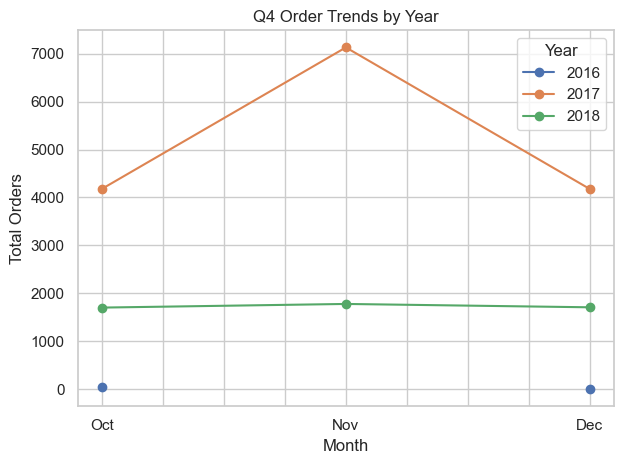

In [17]:
# Pivot for line chart
trend_pivot = trend_data.pivot(index="month_name", columns="order_year", values="order_id").loc[["Oct", "Nov", "Dec"]]

# ✅ Plotting
plt.figure(figsize=(10, 6))
ax = trend_pivot.plot(marker="o")  
ax.set_title("Q4 Order Trends by Year")
ax.set_xlabel("Month")
ax.set_ylabel("Total Orders")
ax.grid(True)
ax.legend(title="Year")
plt.tight_layout()
plt.savefig("q4_order_trends.png")
plt.show()  

In [18]:
# ✅ Export Summary KPIs
summary_df = pd.DataFrame({
    "Total Orders": [total_orders],
    "Total Revenue": [total_revenue],
    "Average Order Value": [average_order_value],
    "Average Review Score": [avg_review_score],
    "Return Rate": [return_rate]
})

summary_df.to_excel("q4_summary_kpis.xlsx", index=False)
orders_q4.to_excel("q4_cleaned_orders.xlsx", index=False)

print("✅ Done! Files generated:")
print("- q4_summary_kpis.xlsx")
print("- q4_cleaned_orders.xlsx")
print("- q4_order_trends.png")


✅ Done! Files generated:
- q4_summary_kpis.xlsx
- q4_cleaned_orders.xlsx
- q4_order_trends.png
